In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f86874bce651cba59e295b94c21dce1dc1495dccc9e2ac15ef1a125c61e422c8
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


Percent Perediction:  75.49


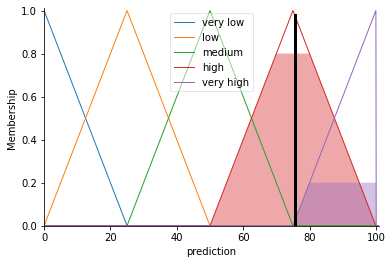

In [ ]:
#EXERCISE 3: Fuzzy model for rainfall events prediction

from skfuzzy import membership
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

value = np.arange(0, 101, 0.1)

#Input variables
temperature = ctrl.Antecedent(value,'temperature')
windspeed = ctrl.Antecedent(value,'windspeed')
rainfall = ctrl.Antecedent(value, 'rainfall')

#Output variable
prediction = ctrl.Consequent(value, 'prediction')

#Membership
def MembershipFunction(field):
  field['very low'] = fuzz.trimf(value, [0, 0, 25])
  field['low'] = fuzz.trimf(value, [0, 25, 50])
  field['medium'] = fuzz.trimf(value, [25, 50, 75])
  field['high'] = fuzz.trimf(value, [50, 75, 100])
  field['very high'] = fuzz.trimf(value, [75, 100, 100])

MembershipFunction(temperature)
MembershipFunction(windspeed)
MembershipFunction(rainfall)
MembershipFunction(prediction)

dict_value = {1: 'very low', 2: 'low', 3: 'medium', 4: 'high', 5:'very high'}

rule = [] # make sure to initialize the rule list
def MakeRule(i):
    f1 = dict_value[val_temperature[i]]
    f2 = dict_value[val_windspeed[i]]
    f3 = dict_value[val_rainfall[i]]
    c = dict_value[prediction_val[i]]
  
    rule.append(ctrl.Rule(temperature[f1] & windspeed[f2] & rainfall[f3], prediction[c]))

val_temperature = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
val_windspeed = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
val_rainfall = [1, 3, 4, 5, 2, 3, 2, 4, 3, 1, 5, 4, 3, 2, 1, 2, 3, 5, 4, 1, 3, 4, 2, 1, 5]
prediction_val = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]



for i in range(25):
  MakeRule(i)

#Control system
prediction_control = ctrl.ControlSystem(rule)
prediction_simulation = ctrl.ControlSystemSimulation(prediction_control)

#Compute
prediction_simulation.input['temperature'] = 80
prediction_simulation.input['windspeed'] = 80
prediction_simulation.input['rainfall'] = 80

prediction_simulation.compute()
print('Percent Perediction: ',round(prediction_simulation.output['prediction'],2))

#Conclusion
prediction.view(sim=prediction_simulation)

Enter Height measurements: 0
Enter Height measurements: -1
Enter Height measurements: 170
Enter Weight measurements: 0
Enter Weight measurements: 70
Enter Gender measurements: 0
Enter Age measurements: 9
Enter Age measurements: 10
Enter Activity measurements: 0
BMI measurents:  24.22
Recommended calorie intake: 2106.99 kcal


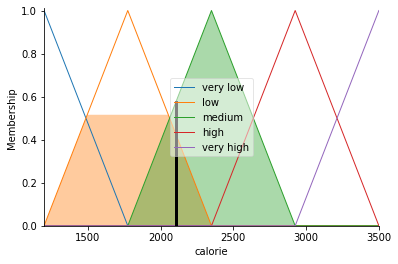

In [ ]:
#EXERCISE 4: Nutritional Needs Recommendation Based on Fuzzy Logic

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Input variables
activity = ctrl.Antecedent(np.arange(0,11,1), 'activity')
bmi = ctrl.Antecedent(np.arange(0,40,1), 'bmi')
age = ctrl.Antecedent(np.arange(10, 85, 1), 'age')
gender = ctrl.Antecedent(np.arange(0, 2, 1), 'gender')

#Output variables
calorie = ctrl.Consequent(np.arange(1200,3501,1), 'calorie')

#Ranges for activity, bmi and age
activity_ranges = {'very light': [0, 0, 2.5],
                   'light':      [0, 2.5, 5],
                   'moderate':   [2.5, 5, 7.5],
                   'heavy':      [5, 10, 10]}

bmi_ranges = {'skinny':     [10, 10, 17],
              'thin':       [17, 17.5, 18.5],
              'normal':     [18.5, 20, 25],
              'overweight': [25, 26, 27],
              'obesity':    [27, 35, 40]}

age_ranges = {'young':   [10, 10, 20, 29],
              'middle':  [29, 50, 65],
              'old':     [65, 75, 80, 80]}

gender_ranges = {'female': [0, 0, 1],
                 'male':   [0, 1, 1]}

#Ranges for calorie
calorie_ranges = {'very low':  [1200, 1200, 1400, 1500],
                  'low':       [1400, 1700, 2000],
                  'medium':    [1800, 2300, 2800],
                  'high':      [2400, 3000, 3500],
                  'very high': [3000, 3300, 3500, 3500]}

#Input variable ranges
activity.automf(names=activity_ranges)
bmi.automf(names=bmi_ranges)
age.automf(names=age_ranges)
gender.automf(names=gender_ranges)

#Consequent variable ranges
calorie.automf(names=calorie_ranges)

#Set rule
# Define rules for calorie recommendation
rules = [    ctrl.Rule(bmi['skinny'] & activity['very light'], calorie['low']),
    ctrl.Rule(bmi['skinny'] & activity['light'], calorie['low']),
    ctrl.Rule(bmi['skinny'] & activity['moderate'], calorie['medium']),
    ctrl.Rule(bmi['skinny'] & activity['heavy'], calorie['high']),
    ctrl.Rule(bmi['thin'] & activity['very light'], calorie['low']),
    ctrl.Rule(bmi['thin'] & activity['light'], calorie['low']),
    ctrl.Rule(bmi['thin'] & activity['moderate'], calorie['medium']),
    ctrl.Rule(bmi['thin'] & activity['heavy'], calorie['high']),
    ctrl.Rule(bmi['normal'] & activity['very light'], calorie['low']),
    ctrl.Rule(bmi['normal'] & activity['light'], calorie['medium']),
    ctrl.Rule(bmi['normal'] & activity['moderate'], calorie['medium']),
    ctrl.Rule(bmi['normal'] & activity['heavy'], calorie['high']),
    ctrl.Rule(bmi['overweight'] & activity['very light'], calorie['medium']),
    ctrl.Rule(bmi['overweight'] & activity['light'], calorie['medium']),
    ctrl.Rule(bmi['overweight'] & activity['moderate'], calorie['high']),
    ctrl.Rule(bmi['overweight'] & activity['heavy'], calorie['high']),
    ctrl.Rule(bmi['obesity'] & activity['very light'], calorie['medium']),
    ctrl.Rule(bmi['obesity'] & activity['light'], calorie['high']),
    ctrl.Rule(bmi['obesity'] & activity['moderate'], calorie['high']),
    ctrl.Rule(bmi['obesity'] & activity['heavy'], calorie['very high']),
    ctrl.Rule(age['young'], calorie['medium']),
    ctrl.Rule(age['middle'], calorie['medium']),
    ctrl.Rule(age['old'], calorie['low']),
    ctrl.Rule(gender['male'], calorie['high']),
    ctrl.Rule(gender['female'], calorie['medium'])
]

# Create control system and simulation
calorie_recommendation = ctrl.ControlSystem(rules)
recommendation = ctrl.ControlSystemSimulation(calorie_recommendation)

Height = float(input('Enter Height measurements: '))   #in cm
while Height <= 0:
  Height = float(input('Enter Height measurements: '))

Weight = float(input('Enter Weight measurements: '))   #in kg
while Weight <= 0:
  Weight = float(input('Enter Weight measurements: '))

Gender = float(input('Enter Gender measurements: '))   #female = 0 | male = 1
while Gender < 0 or Gender > 1:
  Gender = float(input('Enter Gender measurements: '))

Age = float(input('Enter Age measurements: '))      #from 10 to 85
while Age < 10 or Age > 85:
  Age   = float(input('Enter Age measurements: '))

Activity = float(input('Enter Activity measurements: ')) #from 0 to 10
while Activity < 0 or Age > 10:
  Activity   = float(input('Enter Activity1 measurements: '))

#BMI measurements
BMI = Weight/((Height/100)**2)
print('BMI measurents: ', round(BMI,2))

# Set input values
recommendation.input['activity'] = Activity
recommendation.input['bmi'] = BMI
recommendation.input['age'] = Age
recommendation.input['gender'] = Gender

# Compute calorie recommendation
recommendation.compute()

# Print output result
print("Recommended calorie intake:", round(recommendation.output['calorie'], 2), "kcal")
calorie.view(sim = recommendation)
